# BILLIONAIRES CLASSIFICATION & AUTO-ML

<img src="https://thehill.com/wp-content/uploads/sites/2/2020/10/ca_billionaires_money_istock.jpg?strip=1">

<a href="https://www.kaggle.com/datasets/mankotia/top-5-billionaries-india-1983-2023" target="_blank">Data burada</a>

* Auto ml ile classification yaptığımız bu projede "billionaires" datasetini kullanarak farklı değişkenler üzerinden kişilerin yaş durumlarına göre otomatik sınıflandırma yapacağız,

In [33]:
#!pip install pycaret

In [34]:
#!pip install --upgrade pycaret

In [2]:
from pycaret.classification import*
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
from pycaret.classification import*

In [3]:
df=pd.read_csv("Billionaires.csv")

In [4]:
df.head()

,rank,finalWorth,category,personName,age,country,city,source,industries,countryOfCitizenship,...,cpi_change_country,gdp_country,gross_tertiary_education_enrollment,gross_primary_education_enrollment_country,life_expectancy_country,tax_revenue_country_country,total_tax_rate_country,population_country,latitude_country,longitude_country
0,1,211000,Fashion & Retail,Bernard Arnault & family,74.0,France,Paris,LVMH,Fashion & Retail,France,...,1.1,"$2,715,518,274,227",65.6,102.5,82.5,24.2,60.7,67059887.0,46.227638,2.213749
1,2,180000,Automotive,Elon Musk,51.0,United States,Austin,"Tesla, SpaceX",Automotive,United States,...,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,328239523.0,37.090240,-95.712891
2,3,114000,Technology,Jeff Bezos,59.0,United States,Medina,Amazon,Technology,United States,...,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,328239523.0,37.090240,-95.712891
3,4,107000,Technology,Larry Ellison,78.0,United States,Lanai,Oracle,Technology,United States,...,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,328239523.0,37.090240,-95.712891
4,5,106000,Finance & Investments,Warren Buffett,92.0,United States,Omaha,Berkshire Hathaway,Finance & Investments,United States,...,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,328239523.0,37.090240,-95.712891


In [5]:
df.columns

Index(['rank', 'finalWorth', 'category', 'personName', 'age', 'country',
       'city', 'source', 'industries', 'countryOfCitizenship', 'organization',
       'selfMade', 'status', 'gender', 'birthDate', 'lastName', 'firstName',
       'title', 'date', 'state', 'residenceStateRegion', 'birthYear',
       'birthMonth', 'birthDay', 'cpi_country', 'cpi_change_country',
       'gdp_country', 'gross_tertiary_education_enrollment',
       'gross_primary_education_enrollment_country', 'life_expectancy_country',
       'tax_revenue_country_country', 'total_tax_rate_country',
       'population_country', 'latitude_country', 'longitude_country'],
      dtype='object')

<Axes: xlabel='count', ylabel='industries'>

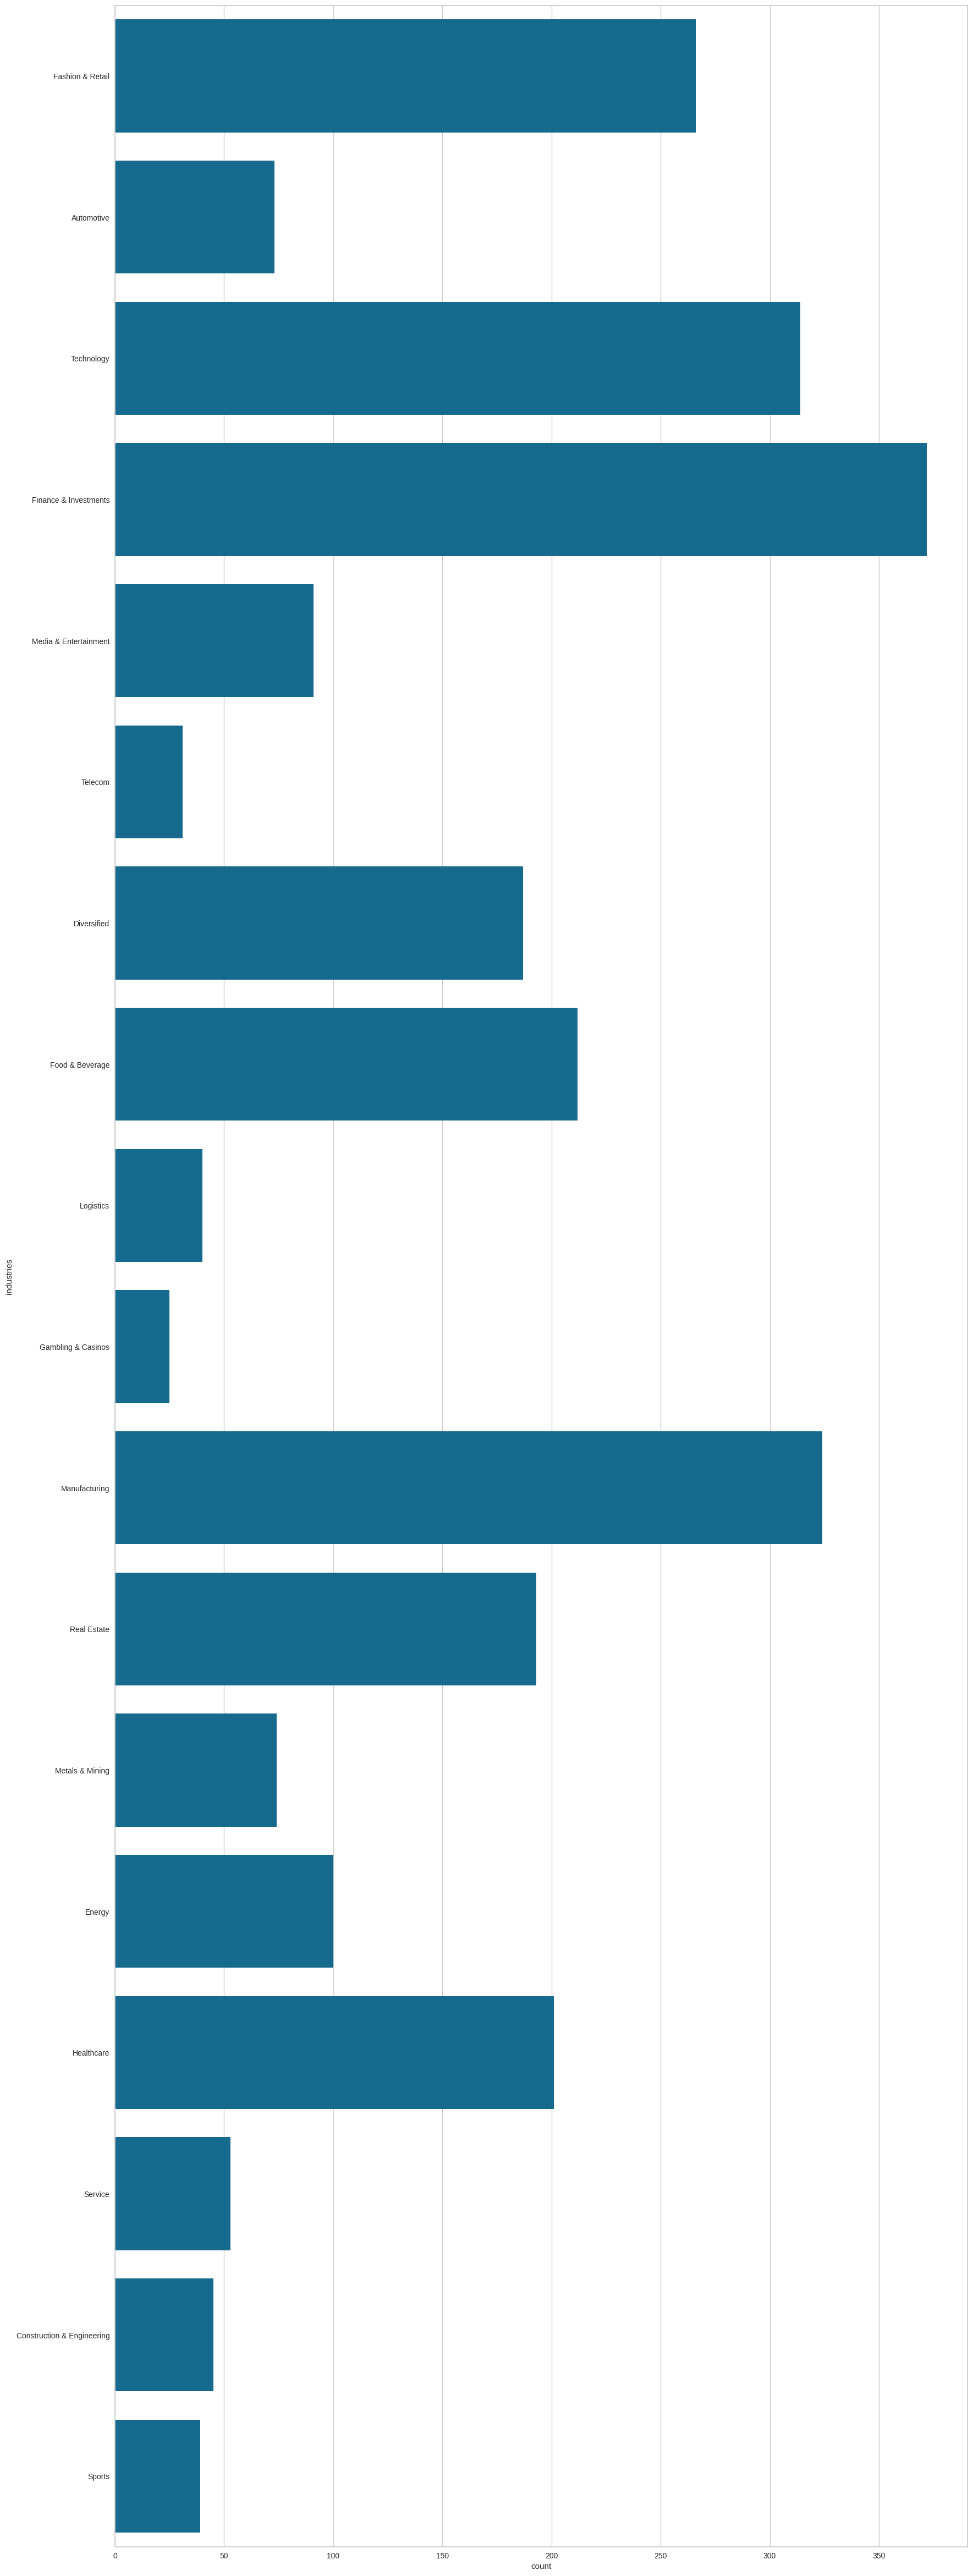

In [6]:
plt.figure(figsize=(20,60))
sns.countplot(y=df['industries'])

<Axes: xlabel='count', ylabel='age'>

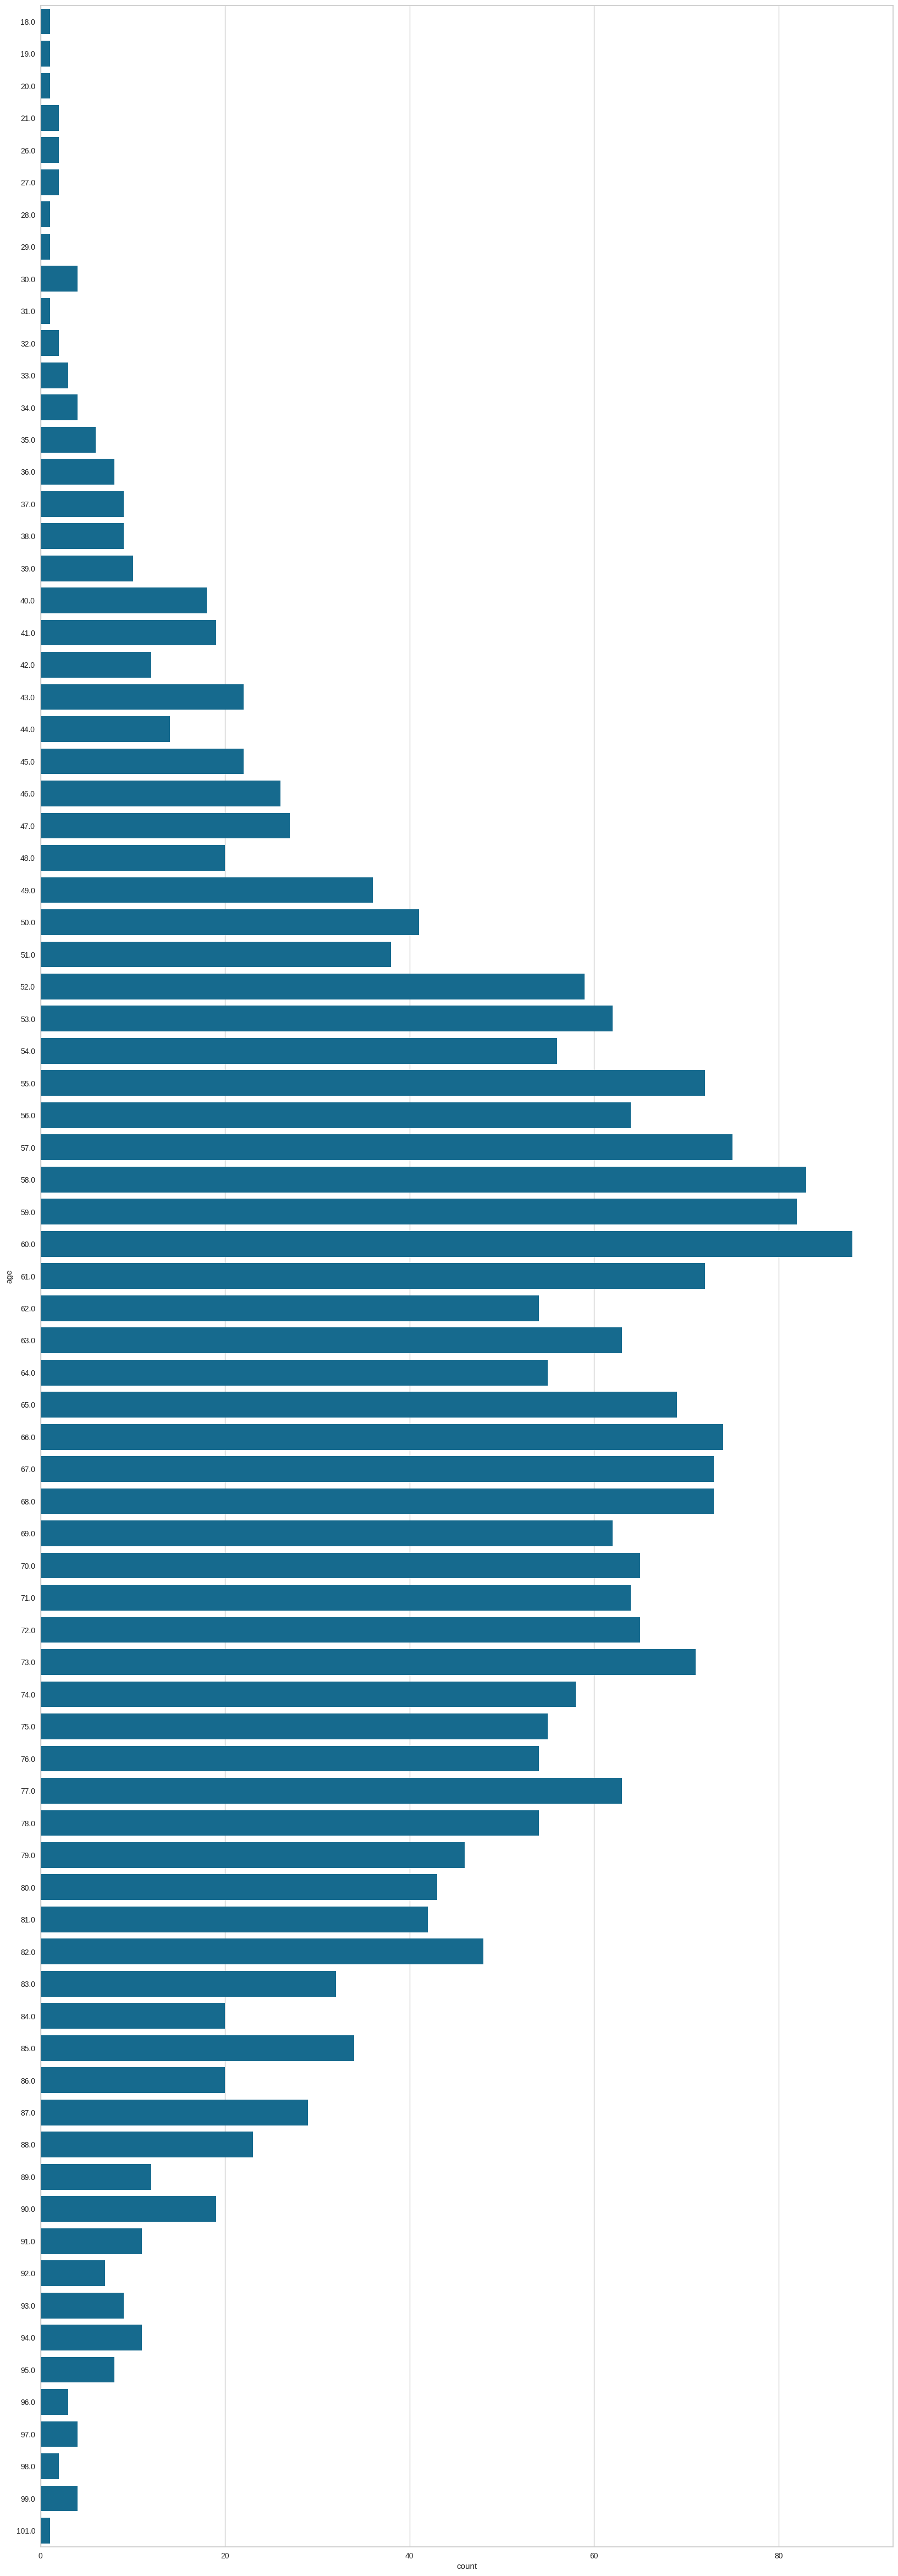

In [7]:
plt.figure(figsize=(20,60))
sns.countplot(y=df['age'])

In [8]:
# 1011 yaşında bir milyoner var, kim olduğuna bakalım
billionaires_101 = df[df['age'] == 101]
print(billionaires_101[['personName', 'age']])
# kendisi şuan 102 yaşında LA'de bir sigorta kralıymış

         personName    age
2180  George Joseph  101.0


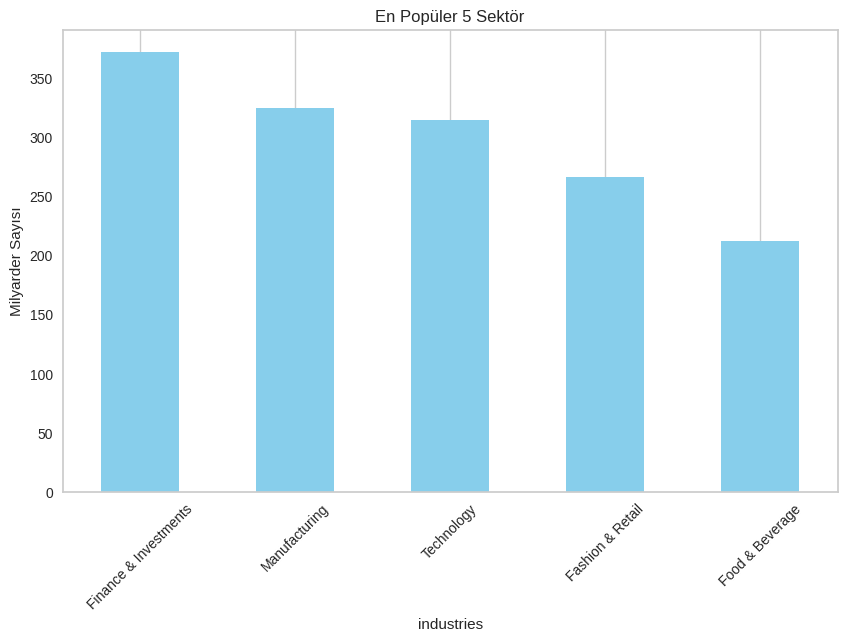

In [9]:
top_industries = df['industries'].value_counts().head(5)
plt.figure(figsize=(10, 6))
top_industries.plot(kind='bar', color='skyblue')
plt.title('En Popüler 5 Sektör')
plt.xlabel('industries')
plt.ylabel('Milyarder Sayısı')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

In [10]:
df['age'].fillna(0, inplace=True) # auto ml fakat boşluğu doldurmadı

In [11]:
print([repr(col) for col in df.columns])  # Sütun adlarının yazılışında hata farkettim çünkü adı doğru yazdığım haşde hata veriyordu

["'rank'", "'finalWorth'", "'category'", "'personName'", "'age'", "'country'", "'city'", "'source'", "'industries'", "'countryOfCitizenship'", "'organization'", "'selfMade'", "'status'", "'gender'", "'birthDate'", "'lastName'", "'firstName'", "'title'", "'date'", "'state'", "'residenceStateRegion'", "'birthYear'", "'birthMonth'", "'birthDay'", "'cpi_country'", "'cpi_change_country'", "'gdp_country'", "'gross_tertiary_education_enrollment'", "'gross_primary_education_enrollment_country'", "'life_expectancy_country'", "'tax_revenue_country_country'", "'total_tax_rate_country'", "'population_country'", "'latitude_country'", "'longitude_country'"]


In [12]:
# Sütun adlarındaki fazladan tırnağı kaldır
df.columns = df.columns.str.strip("'")

In [13]:
print(df.columns.tolist())  # Mevcut sütunları listele

['rank', 'finalWorth', 'category', 'personName', 'age', 'country', 'city', 'source', 'industries', 'countryOfCitizenship', 'organization', 'selfMade', 'status', 'gender', 'birthDate', 'lastName', 'firstName', 'title', 'date', 'state', 'residenceStateRegion', 'birthYear', 'birthMonth', 'birthDay', 'cpi_country', 'cpi_change_country', 'gdp_country', 'gross_tertiary_education_enrollment', 'gross_primary_education_enrollment_country', 'life_expectancy_country', 'tax_revenue_country_country', 'total_tax_rate_country', 'population_country', 'latitude_country', 'longitude_country']


In [14]:
columns_to_delete = ['birthDate', 'birthYear', 'birthMonth', 'birthDay',
                     'cpi_country', 'cpi_change_country', 'gdp_country',
                     'gross_tertiary_education_enrollment',
                     'gross_primary_education_enrollment_country',
                     'life_expectancy_country', 'tax_revenue_country_country',
                     'total_tax_rate_country', 'rank', 'status',
                     'date', 'state', 'residenceStateRegion',
                     'population_country', 'latitude_country',
                     'longitude_country']

df = df.drop(columns=columns_to_delete, errors='ignore')  # errors='ignore' mevcut olmayan sütunları atlar

In [15]:
#setup(df,target='age') # bazı yaşlardan çok az örnek olduğu için hata verdi, değiştirip yapacağım
df_filtered = df[(df['age'] >= 30) & (df['age'] <= 99)]

In [16]:
# Sadece bir örneği olan yaşları görüntüleyin
low_count_ages = df_filtered['age'].value_counts()
print(low_count_ages[low_count_ages == 1])

age
31.0    1
Name: count, dtype: int64


In [17]:
# Yaşları gruplayıp etiketledi, mesela 0-17 arası 0. grup
bins = [0, 18, 30, 45, 60, 75, 90, 100]
labels = ['0-17', '18-29', '30-44', '45-59', '60-74', '75-89', '90+']
df_filtered['age_group'] = pd.cut(df_filtered['age'], bins=bins, labels=labels)

In [18]:
# Yaş gruplarının dağılımını kontrol etdelim
print(df_filtered['age_group'].value_counts())

age_group
60-74    973
45-59    829
75-89    539
30-44    159
90+       59
18-29      4
0-17       0
Name: count, dtype: int64


In [19]:
# Yeterli örneğe sahip grupları tutma
min_samples = 50
valid_age_groups = df_filtered['age_group'].value_counts()[df_filtered['age_group'].value_counts() >= min_samples].index
df_filtered = df_filtered[df_filtered['age_group'].isin(valid_age_groups)]

In [20]:
clf_setup = setup(data=df_filtered, target='age_group', session_id=42)

,Description,Value
0,Session id,42
1,Target,age_group
2,Target type,Multiclass
3,Target mapping,"30-44: 0, 45-59: 1, 60-74: 2, 75-89: 3, 90+: 4"
4,Original data shape,"(2559, 16)"
5,Transformed data shape,"(2559, 50)"
6,Transformed train set shape,"(1791, 50)"
7,Transformed test set shape,"(768, 50)"
8,Numeric features,2
9,Categorical features,12


In [22]:
bestmodel=compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
nb,Naive Bayes,0.8917,0.9807,0.8917,0.8943,0.8904,0.8454,0.8470,0.0450
lr,Logistic Regression,0.8202,0.0000,0.8202,0.8045,0.8088,0.7414,0.7436,0.5820
knn,K Neighbors Classifier,0.7728,0.9251,0.7728,0.7640,0.7596,0.6671,0.6709,0.2960
ada,Ada Boost Classifier,0.7091,0.0000,0.7091,0.5143,0.5929,0.5477,0.6071,0.0690
ridge,Ridge Classifier,0.5120,0.0000,0.5120,0.4854,0.4532,0.2442,0.2670,0.0470
rf,Random Forest Classifier,0.4606,0.9960,0.4606,0.7021,0.3567,0.1406,0.2635,0.0920
et,Extra Trees Classifier,0.4372,0.9375,0.4372,0.3918,0.3141,0.1005,0.1834,0.0850
gbc,Gradient Boosting Classifier,0.4316,0.0000,0.4316,0.2374,0.2708,0.0944,0.2034,0.2480
dt,Decision Tree Classifier,0.3813,0.5009,0.3813,0.2094,0.2119,0.0019,0.0134,0.0450
lda,Linear Discriminant Analysis,0.3813,0.0000,0.3813,0.2094,0.2119,0.0019,0.0134,0.0450


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

In [27]:
from pycaret.classification import models
# Kullanılabilir modelleri listelemem gerekti çünkü pycaret orada geçen isimle kabul etmiyor
available_models = models()
print(available_models)

                                     Name  \
ID                                          
lr                    Logistic Regression   
knn                K Neighbors Classifier   
nb                            Naive Bayes   
dt               Decision Tree Classifier   
svm                   SVM - Linear Kernel   
rbfsvm                SVM - Radial Kernel   
gpc           Gaussian Process Classifier   
mlp                        MLP Classifier   
ridge                    Ridge Classifier   
rf               Random Forest Classifier   
qda       Quadratic Discriminant Analysis   
ada                  Ada Boost Classifier   
gbc          Gradient Boosting Classifier   
lda          Linear Discriminant Analysis   
et                 Extra Trees Classifier   
xgboost         Extreme Gradient Boosting   
lightgbm  Light Gradient Boosting Machine   
dummy                    Dummy Classifier   

                                                  Reference  Turbo  
ID                            

In [28]:
best_model = create_model('nb')  # Naive Bayes modeli oluşturma artık pycarette naive bayes"nb" olarak geçiyor, diğer türlü hata

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9000,0.9894,0.9000,0.9068,0.8997,0.8570,0.8594
1,0.9106,0.9779,0.9106,0.9130,0.9106,0.8733,0.8736
2,0.9106,0.9861,0.9106,0.9176,0.9104,0.8725,0.8750
3,0.8994,0.9839,0.8994,0.8986,0.8957,0.8566,0.8583
4,0.8771,0.9788,0.8771,0.8912,0.8774,0.8246,0.8289
5,0.8659,0.9889,0.8659,0.8715,0.8663,0.8081,0.8097
6,0.9106,0.9649,0.9106,0.9116,0.9107,0.8724,0.8727
7,0.8659,0.9748,0.8659,0.8479,0.8556,0.8068,0.8082
8,0.8883,0.9789,0.8883,0.8942,0.8887,0.8422,0.8433


Processing:   0%|          | 0/4 [00:00<?, ?it/s]